In [1]:
import pandas as pd
data=pd.read_csv('Cell_stats_sim_1.csv',header=None)
data.columns = ['time', 'time_of_day','cell_id','habitat_type','cell_energy_pool','krat_pop','krat_energy','krat_movement','snake_pop','snake_energy','snake_movement']
data['habitat_type'] = data['habitat_type'].replace(to_replace='[<MicrohabitatType.OPEN: 1>]', value='OPEN')
data['habitat_type'] = data['habitat_type'].replace(to_replace='[<MicrohabitatType.BUSH: 2>]', value='BUSH')

In [15]:
#cell_id = str((0,0))
cell = data['habitat_type'][1]
print(cell)
#data.iloc[2950:].head()
#data.iloc[1500:].head(20)

BUSH


In [2]:
data_initial_time= data['time']== min(data['time'])
data_initial_time = data[data_initial_time]
initial_time = data_initial_time['time'].max()
initial_krat_pop = data_initial_time['krat_pop'].sum()
initial_snake_pop = data_initial_time['snake_pop'].sum()
avg_cell_energy = data_initial_time['cell_energy_pool'].sum()/len(data_initial_time['cell_energy_pool'])
prompt = 'time: {}, Avg Cell Energy {}, Krats {}, Snakes {}'.format(initial_time,avg_cell_energy,initial_krat_pop,initial_snake_pop)
cells = data['cell_id'].unique()
print('Number Of Cells: {}'.format(len(cells)))
print('Initial Stats')
print(prompt)

data_final_time= data['time']== max(data['time'])
data_final_time = data[data_final_time]
final_time = data_final_time['time'].max()
final_krat_pop = data_final_time['krat_pop'].sum()
final_snake_pop = data_final_time['snake_pop'].sum()
avg_cell_energy = data_final_time['cell_energy_pool'].sum()/len(data_final_time['cell_energy_pool'])
prompt = 'time: {}, Avg Cell Energy {}, Krats {}, Snakes {}'.format(final_time,avg_cell_energy,final_krat_pop,final_snake_pop)
print('Final Stats')
print(prompt)


Number Of Cells: 2500
Initial Stats
time: 0, Avg Cell Energy 1200.0, Krats 150, Snakes 15
Final Stats
time: 87588, Avg Cell Energy 2404.3496, Krats 0, Snakes 5


0.0


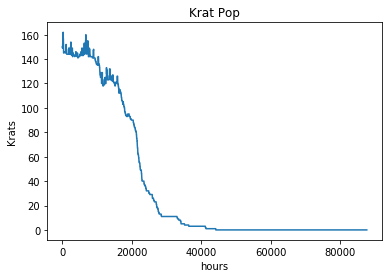

In [3]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "krat_pop"]].groupby("time").sum()
ytemp = list(df.stack())
y = [float(y) for y in ytemp]
xtemp= list(df.index)
x = xtemp[0:len(y)]
print(min(y))

plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krats")
plt.title("Krat Pop")

plt.show()

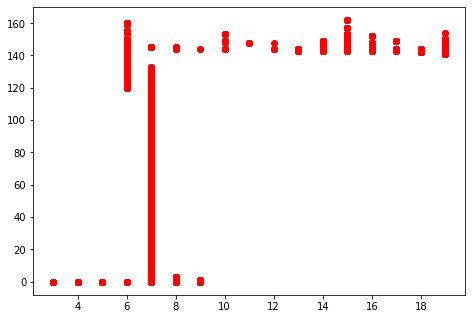

In [13]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "krat_pop","snake_pop"]].groupby("time").sum()
df = df.reset_index()
x = df['snake_pop']
y = df['krat_pop']
#ytemp = list(df.stack())
#y = [float(y) for y in ytemp]
#xtemp= list(df.index)
#x = xtemp[0:len(y)]
#print(min(y))
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y, color='r')

#plt.xlabel("hours")
#plt.ylabel("Krats")
#plt.title("Krat Pop")

plt.show()

Krat
Percent of Time in Bush
0.5345497803710401


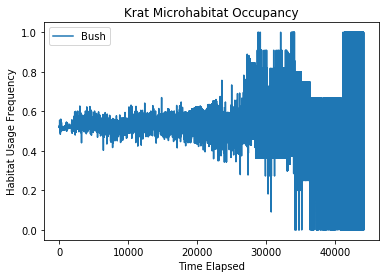

In [4]:
df = data.groupby(["time","habitat_type"]).agg({'krat_pop': ['sum']}).reset_index()
df.columns = ['time','habitat_type','krat_pop']
df = df.pivot(index='time', columns='habitat_type', values='krat_pop').reset_index()
print('Krat')
print('Percent of Time in Bush')
print(df['BUSH'].sum()/(df['BUSH'].sum()+df['OPEN'].sum()))
df['BUSH_OCC'] = df['BUSH']/(df['BUSH']+df['OPEN'])
df['OPEN_OCC'] = df['OPEN']/(df['BUSH']+df['OPEN'])
df= df[['time','BUSH_OCC','OPEN_OCC']]
# line 1 points

# plotting the line 1 points 
plt.plot(df['time'], df['BUSH_OCC'], label = "Bush")
# line 2 points

#plt.plot(df['time'], df['OPEN_OCC'], label = "Open")
plt.xlabel('Time Elapsed')
# Set the y axis label of the current axis.
plt.ylabel('Habitat Usage Frequency')
# Set a title of the current axes.
plt.title('Krat Microhabitat Occupancy')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#add moc if no kangaroo rats in the cell

Snake
Percent of Time in Bush
0.4552909118433668


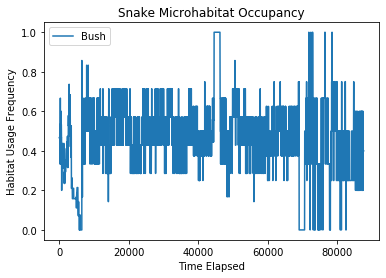

In [15]:
df = data.groupby(["time","habitat_type"]).agg({'snake_pop': ['sum']}).reset_index()
df.columns = ['time','habitat_type','snake_pop']
df = df.pivot(index='time', columns='habitat_type', values='snake_pop').reset_index()
print('Snake')
print('Proportion of Time in Bush')
print(df['BUSH'].sum()/(df['BUSH'].sum()+df['OPEN'].sum()))
df['BUSH_OCC'] = df['BUSH']/(df['BUSH']+df['OPEN'])
df['OPEN_OCC'] = df['OPEN']/(df['BUSH']+df['OPEN'])
df= df[['time','BUSH_OCC','OPEN_OCC']]
# line 1 points

# plotting the line 1 points 
plt.plot(df['time'], df['BUSH_OCC'], label = "Bush")
# line 2 points

#plt.plot(df['time'], df['OPEN_OCC'], label = "Open")
plt.xlabel('Time Elapsed')
# Set the y axis label of the current axis.
plt.ylabel('Habitat Usage Frequency')
# Set a title of the current axes.
plt.title('Snake Microhabitat Occupancy')
# show a legend on the plot
plt.legend()
# Display a figure.

plt.show()

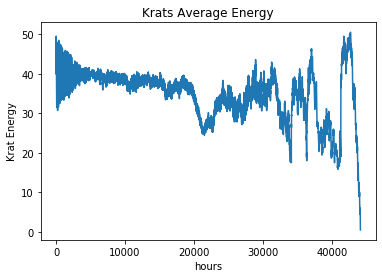

In [16]:
df = pd.DataFrame(data[["time","krat_pop", "krat_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_krat_energy'] = df['krat_energy']/df['krat_pop']
ytemp = list(df['average_krat_energy'])
#if y>0
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krat Energy")
plt.title("Krats Average Energy")

plt.show()

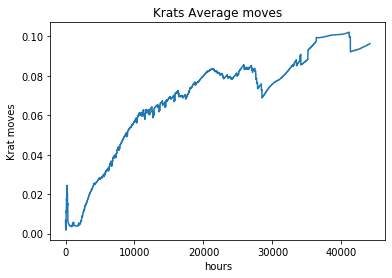

In [5]:
df = pd.DataFrame(data[["time","krat_pop", "krat_movement"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_krat_movment'] = (df['krat_movement']/df['krat_pop'])/df['time']
ytemp = list(df['average_krat_movment'])
#if y>0
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krat moves")
plt.title("Krats Average moves")

plt.show()

3.0


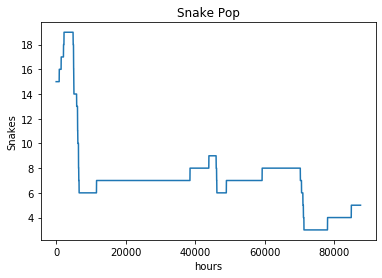

In [18]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "snake_pop"]].groupby("time").sum()
ytemp = list(df.stack())
y = [float(y) for y in ytemp]
xtemp= list(df.index)
#xtemp = list(df['time_of_day'])
x = xtemp[0:len(y)]
print(min(y))


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snakes")
plt.title("Snake Pop")

plt.show()

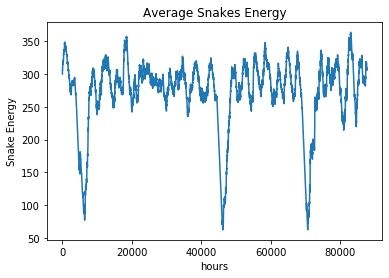

In [19]:
df = pd.DataFrame(data[["time","snake_pop", "snake_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_energy'] = df['snake_energy']/df['snake_pop']
ytemp = list(df['average_snake_energy'])
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snake Energy")
plt.title("Average Snakes Energy")

plt.show()

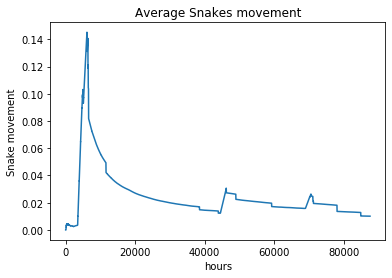

In [20]:
df = pd.DataFrame(data[["time","snake_pop", "snake_movement"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_movement'] = (df['snake_movement']/df['snake_pop'])/df['time']
ytemp = list(df['average_snake_movement'])
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snake movement")
plt.title("Average Snakes movement")

plt.show()

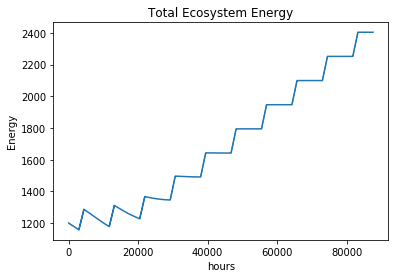

In [21]:
df = data[["time", "cell_energy_pool"]].groupby("time").sum()
cells = data['cell_id'].unique()

ytemp = list(df.stack())
#if (y/80)>2140
y = [y/len(cells) for y in ytemp ]
xtemp= list(df.index)
x = xtemp[0:len(y)]


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Energy")
plt.title("Total Ecosystem Energy")

plt.show()

In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

df = data[['time','cell_id','krat_pop']]

def cell_id_analysis(width,length):
    cell_ids = []
    for x in range(width+1):
        for y in range(length+1):
            cell_id = (x,y)
            cell_ids.append(cell_id)
    return cell_ids

cell_ids =  cell_id_analysis(9,9)
cell_ids = [str(cell_id) for cell_id in cell_ids]
df =df[df['time'] <= 720]
df =df[df.cell_id.isin(cell_ids)]
newdf = df.pivot(index='cell_id', columns='time', values='krat_pop')
time = df['time'].unique()
info = np.array(newdf)
newdf.reset_index(inplace=True)
m = pd.DataFrame(newdf)
cells = m['cell_id'].unique()

fig, ax = plt.subplots(figsize=(15,30))
im = ax.imshow(info)

# We want to show all ticks...
ax.set_xticks(np.arange(len(time)))
ax.set_yticks(np.arange(len(cells)))
# ... and label them with the respective list entries
ax.set_xticklabels(time)
ax.set_yticklabels(cells)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cells)):
    for j in range(len(time)):
        text = ax.text(j, i, int(info[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Krat pop per cells per time")
#fig.tight_layout()
plt.show()

KeyboardInterrupt: 

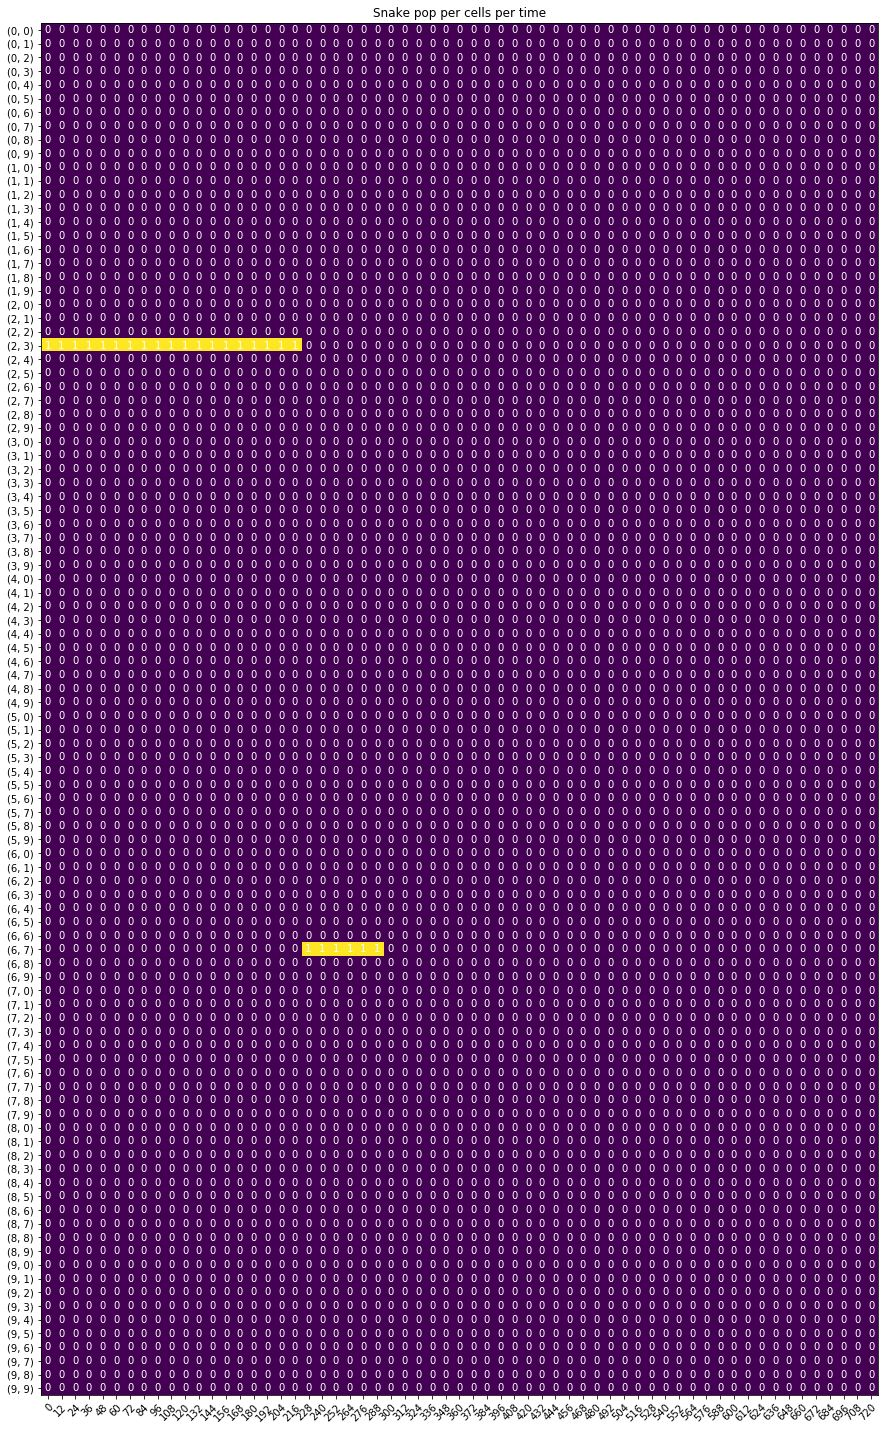

In [13]:

df = data[['time','cell_id','snake_pop']]
cell_ids =  cell_id_analysis(9,9)
cell_ids = [str(cell_id) for cell_id in cell_ids]
df =df[df['time'] <= 720]
df =df[df.cell_id.isin(cell_ids)]
newdf = df.pivot(index='cell_id', columns='time', values='snake_pop').fillna(0)
time = df['time'].unique()
info = np.array(newdf)
newdf.reset_index(inplace=True)
m = pd.DataFrame(newdf)
cells = m['cell_id'].unique()

fig, ax = plt.subplots(figsize=(15,30))
im = ax.imshow(info)

# We want to show all ticks...
ax.set_xticks(np.arange(len(time)))
ax.set_yticks(np.arange(len(cells)))
# ... and label them with the respective list entries
ax.set_xticklabels(time)
ax.set_yticklabels(cells)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cells)):
    for j in range(len(time)):
        text = ax.text(j, i, int(info[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Snake pop per cells per time")
#fig.tight_layout()
plt.show()

In [2]:
import math
def probability_time_step_adjustment(probability_success,time_step,number_of_successes):
    p = probability_success
    q = 1-probability_success
    cn = math.factorial(int(time_step))/(math.factorial(int(time_step - number_of_successes))*math.factorial(int(number_of_successes)))
    prob = cn*p**(number_of_successes)*q**(time_step - number_of_successes)
    return prob


prob_of_success = (7/32)
time_step = 6
for i in range(time_step):
    new_prob =  probability_time_step_adjustment(probability_success = prob_of_success ,time_step = time_step,number_of_successes = i)
    print('i: {}, new prob: {}'.format(i,new_prob))

i: 0, new prob: 0.22737367544323206
i: 1, new prob: 0.38198777474462986
i: 2, new prob: 0.2673914423212409
i: 3, new prob: 0.0998261384665966
i: 4, new prob: 0.020963489077985287
i: 5, new prob: 0.002347910776734352


In [23]:
krat_energy=pd.read_csv('krat_energy.csv',header=None)
krat_energy.columns = ['krat_id','time','energy_delta','forage','move']
forage = pd.DataFrame(krat_energy[["krat_id", "forage"]].groupby("krat_id").sum())
time = pd.DataFrame(krat_energy[["krat_id", "time"]].groupby("krat_id").count())
fin= forage.join(time, on='krat_id')
fin.reset_index(inplace=True)
pct_time_foraged = fin['forage'].sum()/fin['time'].sum()
print('Proportion Time Foraging')
print(pct_time_foraged)
print('Average Energy Delta')
print(krat_energy['energy_delta'].mean())

Proportion Time Foraging
0.775813482380942
Average Energy Delta
-0.09212277592609788


In [32]:
k1 = krat_energy['krat_id']=='2667603288264'
krat_energy[k1].head()
#k1.head()

,krat_id,time,energy_delta,forage,move
0,2667603288264,0,1.0,1,0
1,2667603288264,0,0.0,1,0
2,2667603288264,0,1.0,1,0
3,2667603288264,0,0.0,1,0
4,2667603288264,0,0.0,1,0


In [24]:
snake_energy=pd.read_csv('snake_energy.csv')
snake_energy.columns = ['snake_id','time','energy_delta','hunt','move']
hunt = pd.DataFrame(snake_energy[["snake_id", "hunt"]].groupby("snake_id").sum())
time = pd.DataFrame(snake_energy[["snake_id", "time"]].groupby("snake_id").count())
fin= hunt.join(time, on='snake_id')
fin.reset_index(inplace=True)
pct_time_hunt = float(fin['hunt'].sum())/float(fin['time'].sum())
print('Proportion Time Hunting')
print(pct_time_hunt)
print('Average Energy Delta')
print(snake_energy['energy_delta'].mean())

Proportion Time Hunting
1.0
Average Energy Delta
1.5424421759265101


In [14]:
move=snake_energy['move']==1
snake_energy[move].head()

,snake_id,time,energy_delta,hunt,move
